## Load, Format and Inspect Data

In [75]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages (0.7.0)


In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [261]:
#Read Csv files using Pandas

data = pd.read_csv('germanHeaders.csv', header= None)
data_numeric = pd.read_csv('germancredit.csv', header= None)

In [262]:
#Store Column names
columns = data.iloc[0].tolist()
data.columns = columns

In [263]:
# Drop number headers and replace with descriptive headers
data = data.iloc[1:]

In [264]:
data

,NaN,account_status,duration,credit_history,purpose,credit_amount,savings_account,unemployed,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,credits,job,liable_for,telephone,foreign_worker,good/bad
1,0.0,A11,6,A34,A43,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,1,A192,A201,1
2,1.0,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,2
3,2.0,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,1
4,3.0,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,1
5,4.0,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,995.0,A14,12,A32,A42,1736,A61,A74,3,A92,...,A121,31,A143,A152,1,A172,1,A191,A201,1
997,996.0,A11,30,A32,A41,3857,A61,A73,4,A91,...,A122,40,A143,A152,1,A174,1,A192,A201,1
998,997.0,A14,12,A32,A43,804,A61,A75,4,A93,...,A123,38,A143,A152,1,A173,1,A191,A201,1
999,998.0,A11,45,A32,A43,1845,A61,A73,4,A93,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [265]:
# Drop NaN column
data = data.iloc[:,1:]

In [266]:
data.columns.tolist()

['account_status',
 'duration',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings_account',
 'unemployed',
 'installment_rate',
 'personal_status_sex',
 'debtors/guarantors',
 'present_residence_since',
 'property',
 'age',
 'other_installment_plans',
 'housing',
 'credits',
 'job',
 'liable_for',
 'telephone',
 'foreign_worker',
 'good/bad']

In [267]:
# Drop columns that should not impact risk 
data = data.drop(['foreign_worker', 'telephone', 'liable_for', 'personal_status_sex'], axis=1)
data

,account_status,duration,credit_history,purpose,credit_amount,savings_account,unemployed,installment_rate,debtors/guarantors,present_residence_since,property,age,other_installment_plans,housing,credits,job,good/bad
1,A11,6,A34,A43,1169,A65,A75,4,A101,4,A121,67,A143,A152,2,A173,1
2,A12,48,A32,A43,5951,A61,A73,2,A101,2,A121,22,A143,A152,1,A173,2
3,A14,12,A34,A46,2096,A61,A74,2,A101,3,A121,49,A143,A152,1,A172,1
4,A11,42,A32,A42,7882,A61,A74,2,A103,4,A122,45,A143,A153,1,A173,1
5,A11,24,A33,A40,4870,A61,A73,3,A101,4,A124,53,A143,A153,2,A173,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,A14,12,A32,A42,1736,A61,A74,3,A101,4,A121,31,A143,A152,1,A172,1
997,A11,30,A32,A41,3857,A61,A73,4,A101,4,A122,40,A143,A152,1,A174,1
998,A14,12,A32,A43,804,A61,A75,4,A101,4,A123,38,A143,A152,1,A173,1
999,A11,45,A32,A43,1845,A61,A73,4,A101,4,A124,23,A143,A153,1,A173,2


In [268]:
a_columns = ['account_status', 'credit_history', 'purpose', 'savings_account', 'unemployed', 'debtors/guarantors', 'property', 'other_installment_plans', 'housing', 'job']

a_columns

['account_status',
 'credit_history',
 'purpose',
 'savings_account',
 'unemployed',
 'debtors/guarantors',
 'property',
 'other_installment_plans',
 'housing',
 'job']

In [269]:
data[a_columns] = data[a_columns].replace({'A':''}, regex=True)
data['good/bad'] = data['good/bad'].replace({'2':'0'}, regex=True)

In [270]:
data = data.apply(pd.to_numeric) 
data

,account_status,duration,credit_history,purpose,credit_amount,savings_account,unemployed,installment_rate,debtors/guarantors,present_residence_since,property,age,other_installment_plans,housing,credits,job,good/bad
1,11,6,34,43,1169,65,75,4,101,4,121,67,143,152,2,173,1
2,12,48,32,43,5951,61,73,2,101,2,121,22,143,152,1,173,0
3,14,12,34,46,2096,61,74,2,101,3,121,49,143,152,1,172,1
4,11,42,32,42,7882,61,74,2,103,4,122,45,143,153,1,173,1
5,11,24,33,40,4870,61,73,3,101,4,124,53,143,153,2,173,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,14,12,32,42,1736,61,74,3,101,4,121,31,143,152,1,172,1
997,11,30,32,41,3857,61,73,4,101,4,122,40,143,152,1,174,1
998,14,12,32,43,804,61,75,4,101,4,123,38,143,152,1,173,1
999,11,45,32,43,1845,61,73,4,101,4,124,23,143,153,1,173,0


In [271]:
categorical_data = ["account_status", "credit_history", "purpose", "savings_account", "unemployed", "debtors/guarantors", "property", "other_installment_plans", "housing", "job"]
dummy_data = pd.get_dummies(data, columns=categorical_data)


In [272]:
data.to_csv('german.csv')

## Define X and y

In [273]:
# Assign X (data) and y (target)
X = dummy_data.drop("good/bad", axis=1)
y = dummy_data["good/bad"]
#print(X.shape, y.shape)

In [274]:
#Assign X and Y using dummy encoded data
# Assign X (data) and y (target)
#X = dummy_data.drop("good/bad", axis=1)
#y = dummy_data["good/bad"]
print(X.shape, y.shape)

(1000, 52) (1000,)


Split our data into training and testing

In [275]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [276]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=1)

In [277]:
y_train.value_counts()

0    527
1    523
Name: good/bad, dtype: int64

## Scale Data

In [278]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)


In [279]:
X_test_minmax = min_max_scaler.transform(X_test)


# Create a Logistic Regression Model

In [280]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [281]:
classifier.fit(X_train_minmax, y_train)

LogisticRegression()

In [282]:
print(f"Training Data Score: {classifier.score(X_train_minmax, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_minmax, y_test)}")

Training Data Score: 0.7676190476190476
Testing Data Score: 0.7371428571428571


# Fit (train) or model using the training data

In [283]:
classifier_predictions = classifier.predict(X_test_minmax)
print(f"First 10 Predictions:   {classifier_predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 1 0 0 0 0 0 1 0 0]
First 10 Actual labels: [1, 0, 0, 0, 0, 0, 0, 1, 0, 1]


# Validate the model using the test data

In [285]:
from sklearn.metrics import classification_report

print (classification_report(y_test, classifier_predictions,
                            target_names=["bad","good"]))

              precision    recall  f1-score   support

         bad       0.72      0.76      0.74       173
        good       0.75      0.72      0.73       177

    accuracy                           0.74       350
   macro avg       0.74      0.74      0.74       350
weighted avg       0.74      0.74      0.74       350



In [286]:
pd.DataFrame({"Prediction": classifier_predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,1,1
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
345,1,1
346,1,1
347,0,1
348,1,1


In [287]:
classifier.coef_

array([[-1.47955718, -1.54014023, -0.88146005, -0.07793396,  1.02080088,
        -0.57796503, -0.81322059, -0.41467202,  0.22437589,  1.00496878,
        -0.48243332, -0.574644  , -0.08973504,  0.20689408,  0.94137035,
        -0.71293727,  0.62801763, -0.15413028,  0.16626536, -0.16822147,
        -0.30584076, -0.55888097,  0.61381954, -0.18786431,  0.68122458,
        -0.64452164, -0.32759329,  0.08075607,  0.7345216 ,  0.15828933,
        -0.16415103, -0.43911462, -0.10597715,  0.57254514,  0.13814973,
        -0.16468056, -0.66637859,  0.83251122,  0.19992292, -0.12457018,
         0.06722077, -0.14112144, -0.27301065, -0.00180606,  0.27626878,
        -0.04882482,  0.1604041 , -0.11012722,  0.61045511, -0.10074489,
        -0.14710784, -0.36115031]])

# Optimize with Gridsearch model

In [288]:
#Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [.01, .1, 1, 2],
              'penalty': ['l1', 'l2', 'elasticnet', 'none'],
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid = GridSearchCV(classifier, param_grid, verbose=3)

In [289]:
#Fit the model using the grid search estimator. 
grid.fit(X_train_minmax, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] C=0.01, penalty=l1, solver=newton-cg ............................
[CV] .. C=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, penalty=l1, solver=newton-cg ............................
[CV] .. C=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, penalty=l1, solver=newton-cg ............................
[CV] .. C=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, penalty=l1, solver=newton-cg ............................
[CV] .. C=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, penalty=l1, solver=newton-cg ............................
[CV] .. C=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, penalty=l1, solver=lbfgs ................................
[CV] ...... C=0.01, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.01, penalty=l1, solver=lbfgs ................................
[CV] ...... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver

[CV] .... C=0.01, penalty=l2, solver=lbfgs, score=0.724, total=   0.0s
[CV] C=0.01, penalty=l2, solver=lbfgs ................................
[CV] .... C=0.01, penalty=l2, solver=lbfgs, score=0.810, total=   0.0s
[CV] C=0.01, penalty=l2, solver=lbfgs ................................
[CV] .... C=0.01, penalty=l2, solver=lbfgs, score=0.714, total=   0.0s
[CV] C=0.01, penalty=l2, solver=liblinear ............................
[CV]  C=0.01, penalty=l2, solver=liblinear, score=0.705, total=   0.0s
[CV] C=0.01, penalty=l2, solver=liblinear ............................
[CV]  C=0.01, penalty=l2, solver=liblinear, score=0.724, total=   0.0s
[CV] C=0.01, penalty=l2, solver=liblinear ............................
[CV]  C=0.01, penalty=l2, solver=liblinear, score=0.733, total=   0.0s
[CV] C=0.01, penalty=l2, solver=liblinear ............................
[CV]  C=0.01, penalty=l2, solver=liblinear, score=0.795, total=   0.0s
[CV] C=0.01, penalty=l2, solver=liblinear ............................
[CV]  

/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  Fit

[CV]  C=0.01, penalty=none, solver=newton-cg, score=0.719, total=   0.0s
[CV] C=0.01, penalty=none, solver=newton-cg ..........................
[CV]  C=0.01, penalty=none, solver=newton-cg, score=0.767, total=   0.0s
[CV] C=0.01, penalty=none, solver=newton-cg ..........................
[CV]  C=0.01, penalty=none, solver=newton-cg, score=0.729, total=   0.0s
[CV] C=0.01, penalty=none, solver=newton-cg ..........................
[CV]  C=0.01, penalty=none, solver=newton-cg, score=0.752, total=   0.0s
[CV] C=0.01, penalty=none, solver=newton-cg ..........................
[CV]  C=0.01, penalty=none, solver=newton-cg, score=0.733, total=   0.0s
[CV] C=0.01, penalty=none, solver=lbfgs ..............................
[CV] .. C=0.01, penalty=none, solver=lbfgs, score=0.719, total=   0.0s
[CV] C=0.01, penalty=none, solver=lbfgs ..............................
[CV] .. C=0.01, penalty=none, solver=lbfgs, score=0.767, total=   0.0s
[CV] C=0.01, penalty=none, solver=lbfgs ...........................

/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 454, in _check_solver
    "penalty='none' is not supported for the liblinear solver"
ValueError: penalty='none' is not supported for the liblinear solver

  FitFail

[CV] .... C=0.01, penalty=none, solver=sag, score=0.719, total=   0.0s
[CV] C=0.01, penalty=none, solver=sag ................................
[CV] .... C=0.01, penalty=none, solver=sag, score=0.767, total=   0.0s
[CV] C=0.01, penalty=none, solver=sag ................................
[CV] .... C=0.01, penalty=none, solver=sag, score=0.729, total=   0.0s
[CV] C=0.01, penalty=none, solver=sag ................................
[CV] .... C=0.01, penalty=none, solver=sag, score=0.752, total=   0.0s
[CV] C=0.01, penalty=none, solver=sag ................................
[CV] .... C=0.01, penalty=none, solver=sag, score=0.733, total=   0.0s
[CV] C=0.01, penalty=none, solver=saga ...............................
[CV] ... C=0.01, penalty=none, solver=saga, score=0.719, total=   0.0s
[CV] C=0.01, penalty=none, solver=saga ...............................
[CV] ... C=0.01, penalty=none, solver=saga, score=0.767, total=   0.0s
[CV] C=0.01, penalty=none, solver=saga ...............................
[CV] .

/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/tajahneiwilliams/opt/

[CV] ... C=0.01, penalty=none, solver=saga, score=0.733, total=   0.0s
[CV] C=0.1, penalty=l1, solver=newton-cg .............................
[CV] ... C=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, penalty=l1, solver=newton-cg .............................
[CV] ... C=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, penalty=l1, solver=newton-cg .............................
[CV] ... C=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, penalty=l1, solver=newton-cg .............................
[CV] ... C=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, penalty=l1, solver=newton-cg .............................
[CV] ... C=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, penalty=l1, solver=lbfgs .................................
[CV] ....... C=0.1, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, penalty=l1, solver=lbfgs .................................
[CV] .

/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  Fit

[CV]  C=0.1, penalty=none, solver=newton-cg, score=0.767, total=   0.0s
[CV] C=0.1, penalty=none, solver=newton-cg ...........................
[CV]  C=0.1, penalty=none, solver=newton-cg, score=0.729, total=   0.0s
[CV] C=0.1, penalty=none, solver=newton-cg ...........................
[CV]  C=0.1, penalty=none, solver=newton-cg, score=0.752, total=   0.0s
[CV] C=0.1, penalty=none, solver=newton-cg ...........................
[CV]  C=0.1, penalty=none, solver=newton-cg, score=0.733, total=   0.0s
[CV] C=0.1, penalty=none, solver=lbfgs ...............................
[CV] ... C=0.1, penalty=none, solver=lbfgs, score=0.719, total=   0.0s
[CV] C=0.1, penalty=none, solver=lbfgs ...............................
[CV] ... C=0.1, penalty=none, solver=lbfgs, score=0.767, total=   0.0s
[CV] C=0.1, penalty=none, solver=lbfgs ...............................
[CV] ... C=0.1, penalty=none, solver=lbfgs, score=0.729, total=   0.0s
[CV] C=0.1, penalty=none, solver=lbfgs ...............................
[C

/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' w

[CV] ..... C=0.1, penalty=none, solver=sag, score=0.752, total=   0.0s
[CV] C=0.1, penalty=none, solver=sag .................................
[CV] ..... C=0.1, penalty=none, solver=sag, score=0.733, total=   0.0s
[CV] C=0.1, penalty=none, solver=saga ................................
[CV] .... C=0.1, penalty=none, solver=saga, score=0.719, total=   0.0s
[CV] C=0.1, penalty=none, solver=saga ................................
[CV] .... C=0.1, penalty=none, solver=saga, score=0.767, total=   0.0s
[CV] C=0.1, penalty=none, solver=saga ................................
[CV] .... C=0.1, penalty=none, solver=saga, score=0.729, total=   0.0s
[CV] C=0.1, penalty=none, solver=saga ................................
[CV] .... C=0.1, penalty=none, solver=saga, score=0.752, total=   0.0s
[CV] C=0.1, penalty=none, solver=saga ................................
[CV] .... C=0.1, penalty=none, solver=saga, score=0.733, total=   0.0s
[CV] C=1, penalty=l1, solver=newton-cg ...............................
[CV] .

/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWa

[CV] ........ C=1, penalty=l1, solver=saga, score=0.705, total=   0.0s
[CV] C=1, penalty=l1, solver=saga ....................................
[CV] ........ C=1, penalty=l1, solver=saga, score=0.767, total=   0.0s
[CV] C=1, penalty=l1, solver=saga ....................................
[CV] ........ C=1, penalty=l1, solver=saga, score=0.743, total=   0.0s
[CV] C=1, penalty=l1, solver=saga ....................................
[CV] ........ C=1, penalty=l1, solver=saga, score=0.757, total=   0.0s
[CV] C=1, penalty=l1, solver=saga ....................................
[CV] ........ C=1, penalty=l1, solver=saga, score=0.733, total=   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ... C=1, penalty=l2, solver=newton-cg, score=0.710, total=   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ... C=1, penalty=l2, solver=newton-cg, score=0.762, total=   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] .

/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarni

[CV] ........ C=1, penalty=l2, solver=saga, score=0.729, total=   0.0s
[CV] C=1, penalty=elasticnet, solver=newton-cg .......................
[CV]  C=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, penalty=elasticnet, solver=newton-cg .......................
[CV]  C=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, penalty=elasticnet, solver=newton-cg .......................
[CV]  C=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, penalty=elasticnet, solver=newton-cg .......................
[CV]  C=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, penalty=elasticnet, solver=newton-cg .......................
[CV]  C=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, penalty=elasticnet, solver=lbfgs ...........................
[CV] . C=1, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, penalty=elasticnet, solver=lbfgs ...................

/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1313, in fit
    " got (l1_ratio=%r)" % self.l1_ratio)
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will 

[CV] ....... C=1, penalty=none, solver=sag, score=0.719, total=   0.0s
[CV] C=1, penalty=none, solver=sag ...................................
[CV] ....... C=1, penalty=none, solver=sag, score=0.767, total=   0.0s
[CV] C=1, penalty=none, solver=sag ...................................
[CV] ....... C=1, penalty=none, solver=sag, score=0.729, total=   0.0s
[CV] C=1, penalty=none, solver=sag ...................................
[CV] ....... C=1, penalty=none, solver=sag, score=0.752, total=   0.0s
[CV] C=1, penalty=none, solver=sag ...................................
[CV] ....... C=1, penalty=none, solver=sag, score=0.733, total=   0.0s
[CV] C=1, penalty=none, solver=saga ..................................
[CV] ...... C=1, penalty=none, solver=saga, score=0.719, total=   0.0s
[CV] C=1, penalty=none, solver=saga ..................................
[CV] ...... C=1, penalty=none, solver=saga, score=0.767, total=   0.0s
[CV] C=1, penalty=none, solver=saga ..................................
[CV] .

/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWa

[CV] ........ C=2, penalty=l1, solver=saga, score=0.729, total=   0.0s
[CV] C=2, penalty=l2, solver=newton-cg ...............................
[CV] ... C=2, penalty=l2, solver=newton-cg, score=0.714, total=   0.0s
[CV] C=2, penalty=l2, solver=newton-cg ...............................
[CV] ... C=2, penalty=l2, solver=newton-cg, score=0.762, total=   0.0s
[CV] C=2, penalty=l2, solver=newton-cg ...............................
[CV] ... C=2, penalty=l2, solver=newton-cg, score=0.729, total=   0.0s
[CV] C=2, penalty=l2, solver=newton-cg ...............................
[CV] ... C=2, penalty=l2, solver=newton-cg, score=0.752, total=   0.0s
[CV] C=2, penalty=l2, solver=newton-cg ...............................
[CV] ... C=2, penalty=l2, solver=newton-cg, score=0.724, total=   0.0s
[CV] C=2, penalty=l2, solver=lbfgs ...................................
[CV] ....... C=2, penalty=l2, solver=lbfgs, score=0.714, total=   0.0s
[CV] C=2, penalty=l2, solver=lbfgs ...................................
[CV] .

/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarni

[CV] ........ C=2, penalty=l2, solver=saga, score=0.714, total=   0.0s
[CV] C=2, penalty=l2, solver=saga ....................................
[CV] ........ C=2, penalty=l2, solver=saga, score=0.762, total=   0.0s
[CV] C=2, penalty=l2, solver=saga ....................................
[CV] ........ C=2, penalty=l2, solver=saga, score=0.729, total=   0.0s
[CV] C=2, penalty=l2, solver=saga ....................................
[CV] ........ C=2, penalty=l2, solver=saga, score=0.752, total=   0.0s
[CV] C=2, penalty=l2, solver=saga ....................................
[CV] ........ C=2, penalty=l2, solver=saga, score=0.724, total=   0.0s
[CV] C=2, penalty=elasticnet, solver=newton-cg .......................
[CV]  C=2, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, penalty=elasticnet, solver=newton-cg .......................
[CV]  C=2, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, penalty=elasticnet, solver=newton-cg .......................


/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1313, in fit
    " got (l1_ratio=%r)" % self.l1_ratio)
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will 

[CV] ....... C=2, penalty=none, solver=sag, score=0.767, total=   0.0s
[CV] C=2, penalty=none, solver=sag ...................................
[CV] ....... C=2, penalty=none, solver=sag, score=0.729, total=   0.0s
[CV] C=2, penalty=none, solver=sag ...................................
[CV] ....... C=2, penalty=none, solver=sag, score=0.752, total=   0.0s
[CV] C=2, penalty=none, solver=sag ...................................
[CV] ....... C=2, penalty=none, solver=sag, score=0.733, total=   0.0s
[CV] C=2, penalty=none, solver=saga ..................................
[CV] ...... C=2, penalty=none, solver=saga, score=0.719, total=   0.0s
[CV] C=2, penalty=none, solver=saga ..................................
[CV] ...... C=2, penalty=none, solver=saga, score=0.767, total=   0.0s
[CV] C=2, penalty=none, solver=saga ..................................
[CV] ...... C=2, penalty=none, solver=saga, score=0.729, total=   0.0s
[CV] C=2, penalty=none, solver=saga ..................................
[CV] .

/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/tajahneiwilliams/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' w

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 2],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [290]:
 #List the best parameters for this dataset
print(grid.best_params_)
#List the best score
print(grid.best_score_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.7438095238095238


In [291]:
print(f"Training Data Score: {grid.score(X_train_minmax, y_train)}")
print(f"Testing Data Score: {grid.score(X_test_minmax, y_test)}")

Training Data Score: 0.7666666666666667
Testing Data Score: 0.7142857142857143


# Make predictions

In [292]:
#Make predictions with the hypertuned model
grid_predictions = grid.predict(X_test_minmax)

In [293]:

print(f"First 10 Predictions:   {grid_predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 1 0 0 0 0 0 1 0 0]
First 10 Actual labels: [1, 0, 0, 0, 0, 0, 0, 1, 0, 1]


In [294]:
from sklearn.metrics import classification_report

print (classification_report(y_test, grid_predictions,
                            target_names=["bad","good"]))

              precision    recall  f1-score   support

         bad       0.69      0.77      0.73       173
        good       0.75      0.66      0.70       177

    accuracy                           0.71       350
   macro avg       0.72      0.71      0.71       350
weighted avg       0.72      0.71      0.71       350



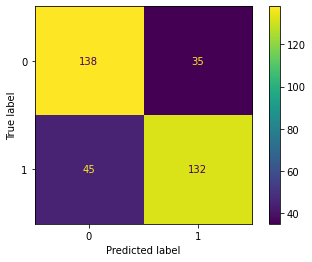

In [295]:
# Import dependencies and plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt

clf = SVC(random_state=1)
clf.fit(X_train_minmax, y_train)
SVC(random_state=1)
plot_confusion_matrix(clf, X_test_minmax, y_test)
plt.show()